In [1]:
#Importing of dependencies, maybe don't need all?
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit as poly
import statsmodels.api as sm
import scipy as stats
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as mt
from pprint import pprint

In [3]:
#read our Fangraphs data from the following links:
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=1&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
#https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=10&type=5&season=2018&month=0&season1=2002&ind=1&team=0&rost=0&age=0&filter=&players=0
pdstats = pd.read_csv("Resources/Leaderboard.csv")
restats = pd.read_csv("Resources/Leaderboard2.csv")
bastats = pd.read_csv("Resources/Leaderboard3.csv")
# Combine individual player seasons
one = pd.merge(pdstats, restats, on=['Season', 'playerid'])
# Remove data that is not likely to be relevant
one = one.drop(['Team_x', 'LOB%', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'AVG', 'WHIP', 'K/BB', 'K/9', 'BB/9', 'HR/9', 'SIERA', 'Name_y', 'Team_y'], axis=1)
total = pd.merge(one, bastats, on=['Season', 'playerid'])
total = total.drop(['W', 'L', 'Name'], axis = 1)

In [4]:
## Remove all of the % signs from the Data
total['O-Swing%'] = total['O-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Swing%'] = total['Z-Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['Swing%'] = total['Swing%'].str.replace(r' %', r'').astype('float') /100.0
total['O-Contact%'] = total['O-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Zone%'] = total['Zone%'].str.replace(r' %', r'').astype('float') /100.0
total['Z-Contact%'] = total['Z-Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['Contact%'] = total['Contact%'].str.replace(r' %', r'').astype('float') /100.0
total['F-Strike%'] = total['F-Strike%'].str.replace(r' %', r'').astype('float') /100.0
total['SwStr%'] = total['SwStr%'].str.replace(r' %', r'').astype('float') /100.0
total['K%'] = total['K%'].str.replace(r' %', r'').astype('float') /100.0
total['BB%'] = total['BB%'].str.replace(r' %', r'').astype('float') /100.0
total['K-BB%'] = total['K-BB%'].str.replace(r' %', r'').astype('float') /100.0

In [5]:
# Add variables for calculatiopns based on Plate discipline data
# Out of zone %
total['O-Zone%'] = 1 - total['Zone%']
# Zone swing percentage
total['ZSwing'] = total['Zone%'] * total['Z-Swing%']
# Zone Looking %
total['ZLook'] = total['Zone%'] * (1- total['Z-Swing%'])
# Out of Zone swing %
total['OSwing'] = total['O-Zone%'] * total['O-Swing%']
# Out of zone looking percentage
total['OLook'] = total['O-Zone%'] * (1- total['O-Swing%'])
# Zone contact percentage
total['ZCon'] = total['ZSwing'] * total['Z-Contact%']
# Zone Whiff percentage
total['ZWif'] = total['ZSwing'] * (1 -total['Z-Contact%'])
# Out of zone contact percentage
total['OCon'] = total['OSwing'] * total['O-Contact%']
# Out of zone Whiff percentage
total['OWif'] = total['OSwing'] * (1 -total['O-Contact%'])
total.to_csv("Resources/data.csv")

In [6]:
t2002 = total[total.Season == 2002]
t2003 = total[total.Season == 2003]
t2004 = total[total.Season == 2004]
t2005 = total[total.Season == 2005]
t2006 = total[total.Season == 2006]
t2007 = total[total.Season == 2007]
t2008 = total[total.Season == 2008]
t2009 = total[total.Season == 2009]
t2010 = total[total.Season == 2010]
t2011 = total[total.Season == 2011]
t2012 = total[total.Season == 2012]
t2013 = total[total.Season == 2013]
t2014 = total[total.Season == 2014]
t2015 = total[total.Season == 2015]
t2016 = total[total.Season == 2016]
t2017 = total[total.Season == 2017]
t2018 = total[total.Season == 2018]

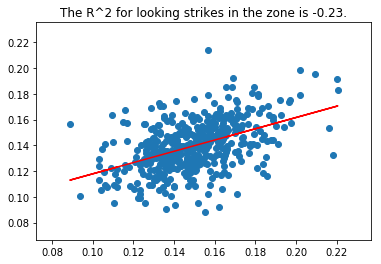

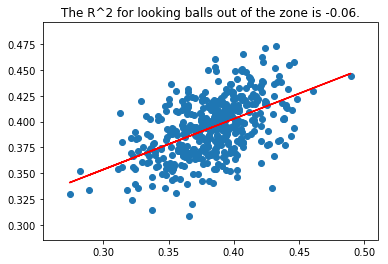

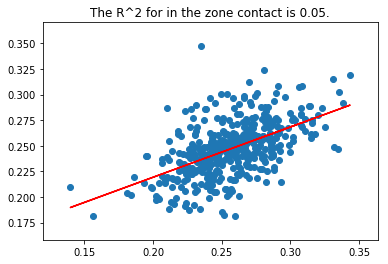

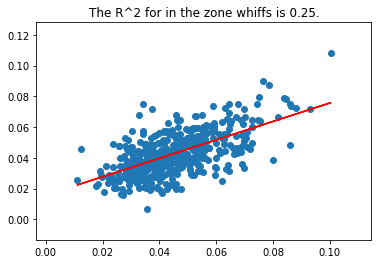

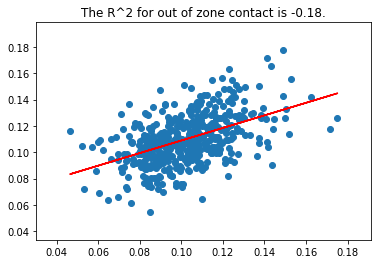

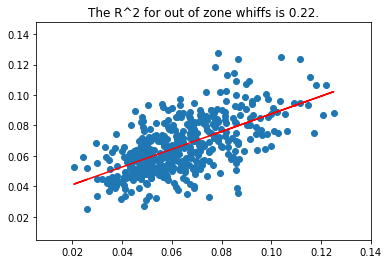

In [12]:
graph = pd.merge(t2017, t2018, on=['playerid'])
plt.figure(0)
plt.scatter(graph.ZLook_x, graph.ZLook_y)
b, m = poly(graph.ZLook_x, graph.ZLook_y, 1)
plt.plot(graph.ZLook_x, b + m * graph.ZLook_x, '-', c='r')
sc = mt.r2_score(graph.ZLook_x, graph.ZLook_y)
plt.title(f'The R^2 for looking strikes in the zone is {round(sc,2)}.')
plt.savefig('Outputs/1718Zlook.png')

plt.figure(1)
plt.scatter(graph.OLook_x, graph.OLook_y)
b, m = poly(graph.OLook_x, graph.OLook_y, 1)
plt.plot(graph.OLook_x, b + m * graph.OLook_x, '-', c='r')
sc = mt.r2_score(graph.OLook_x, graph.OLook_y)
plt.title(f'The R^2 for looking balls out of the zone is {round(sc,2)}.')
plt.savefig('Outputs/1718Olook.png')

plt.figure(2)
plt.scatter(graph.ZCon_x, graph.ZCon_y)
b, m = poly(graph.ZCon_x, graph.ZCon_y, 1)
plt.plot(graph.ZCon_x, b + m * graph.ZCon_x, '-', c='r')
sc = mt.r2_score(graph.ZCon_x, graph.ZCon_y)
plt.title(f'The R^2 for in the zone contact is {round(sc,2)}.')
plt.savefig('Outputs/1718Olook.png')


plt.figure(3)
plt.scatter(graph.ZWif_x, graph.ZWif_y)
b, m = poly(graph.ZWif_x, graph.ZWif_y, 1)
plt.plot(graph.ZWif_x, b + m * graph.ZWif_x, '-', c='r')
sc = mt.r2_score(graph.ZWif_x, graph.ZWif_y)
plt.title(f'The R^2 for in the zone whiffs is {round(sc,2)}.')
plt.savefig('Outputs/1718ZWif.png')

plt.figure(4)
plt.scatter(graph.OCon_x, graph.OCon_y)
b, m = poly(graph.OCon_x, graph.OCon_y, 1)
plt.plot(graph.OCon_x, b + m * graph.OCon_x, '-', c='r')
sc = mt.r2_score(graph.OCon_x, graph.OCon_y)
plt.title(f'The R^2 for out of zone contact is {round(sc,2)}.')
plt.savefig('Outputs/1718OCon.png')

plt.figure(5)
plt.scatter(graph.OWif_x, graph.OWif_y)
b, m = poly(graph.OWif_x, graph.OWif_y, 1)
plt.plot(graph.OWif_x, b + m * graph.OWif_x, '-', c='r')
sc = mt.r2_score(graph.OWif_x, graph.OWif_y)
plt.title(f'The R^2 for out of zone whiffs is {round(sc,2)}.')
plt.savefig('Outputs/1718OWif.png')

plt.show()

In [13]:
tester = total[total.Season > 2012]
tester = tester[tester.Season < 2017]
test = total[total.Season > 2016]

In [14]:
xx =tester[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
kk = tester['K%']
bb = tester['BB%']
kb = tester['K-BB%']


xxx = test[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
kkk = test['K%']
bbb = test['BB%']
kbk = test['K-BB%']

In [37]:
lm = linear_model.LinearRegression()
kmodel = lm.fit(xxx, kkk)
bmodel = lm.fit(xxx, bbb)
kbmodel = lm.fit(xxx, kbk)
predictions = kmodel.predict(xx)
predict = bmodel.predict(xx)
predicts = kbmodel.predict(xx)
tester['xK%'] = predictions
tester['xBB%'] = predict
tester['xK-BB%'] = predicts

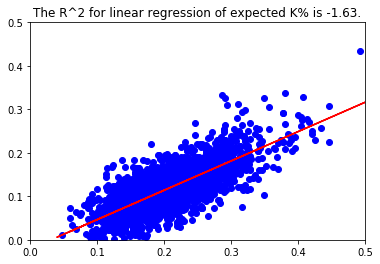

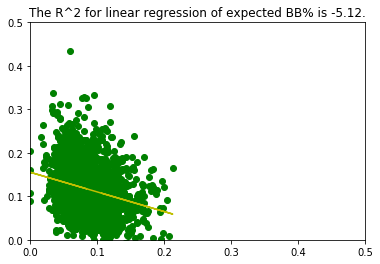

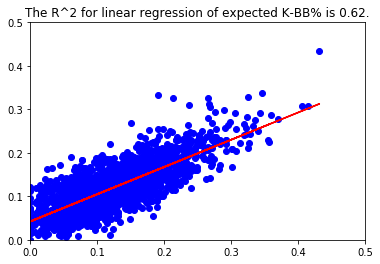

In [29]:
plt.figure(0)
#plt.scatter(xxx, yyy, c='r')

plt.scatter(kk, predictions, c='b')
b, m = poly(kk, predictions, 1)
plt.plot(kk, b + m * kk, '-', c='r')
sm = mt.r2_score(kk, predictions)
plt.title(f'The R^2 for linear regression of expected K% is {round(sm,2)}.')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/lk.png')

plt.figure(1)
plt.scatter(bb, predict, c='g')
b, m = poly(bb, predict, 1)
plt.plot(bb, b + m * bb, '-', c='y')
sm = mt.r2_score(bb, predict)
plt.title(f'The R^2 for linear regression of expected BB% is {round(sm,2)}.')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/lbb.png')

plt.figure(2)
plt.scatter(kb, predicts, c='b')
b, m = poly(kb, predicts, 1)
plt.plot(kb, b + m * kb, '-', c='r')
sm = mt.r2_score(kb, predicts)
plt.title(f'The R^2 for linear regression of expected K-BB% is {round(sm,2)}.')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/lkbb.png')


In [22]:
pds = pd.read_csv("Resources/2019.csv")
res = pd.read_csv("Resources/20192.csv")
bas = pd.read_csv("Resources/20193.csv")
# Combine individual player seasons
imp = pd.merge(pds, res, on=['playerid'])
tota = pd.merge(imp, bas, on=['playerid'])
tota = tota.drop(['W', 'L', 'Name'], axis = 1)
# Remove data that is not likely to be relevant
tota = tota.drop(['Team_x', 'LOB%', 'ERA-', 'FIP-', 'xFIP-', 'E-F', 'AVG', 'WHIP', 'K/BB', 'K/9', 'BB/9', 'HR/9', 'SIERA', 'Name_y', 'Team_y'], axis=1)
# Remove all of the % signs from the Data
tota['O-Swing%'] = tota['O-Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['Z-Swing%'] = tota['Z-Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['Swing%'] = tota['Swing%'].str.replace(r' %', r'').astype('float') /100.0
tota['O-Contact%'] = tota['O-Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['Zone%'] = tota['Zone%'].str.replace(r' %', r'').astype('float') /100.0
tota['Z-Contact%'] = tota['Z-Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['Contact%'] = tota['Contact%'].str.replace(r' %', r'').astype('float') /100.0
tota['F-Strike%'] = tota['F-Strike%'].str.replace(r' %', r'').astype('float') /100.0
tota['SwStr%'] = tota['SwStr%'].str.replace(r' %', r'').astype('float') /100.0
tota['K%'] = tota['K%'].str.replace(r' %', r'').astype('float') /100.0
tota['BB%'] = tota['BB%'].str.replace(r' %', r'').astype('float') /100.0
tota['K-BB%'] = tota['K-BB%'].str.replace(r' %', r'').astype('float') /100.0
tota['O-Zone%'] = 1 - total['Zone%']
# Zone swing percentage
tota['ZSwing'] = tota['Zone%'] * tota['Z-Swing%']
# Zone Looking %
tota['ZLook'] = tota['Zone%'] * (1- tota['Z-Swing%'])
# Out of Zone swing %
tota['OSwing'] = tota['O-Zone%'] * tota['O-Swing%']
# Out of zone looking percentage
tota['OLook'] = tota['O-Zone%'] * (1- tota['O-Swing%'])
# Zone contact percentage
tota['ZCon'] = tota['ZSwing'] * tota['Z-Contact%']
# Zone Whiff percentage
tota['ZWif'] = tota['ZSwing'] * (1 -tota['Z-Contact%'])
# Out of zone contact percentage
tota['OCon'] = tota['OSwing'] * tota['O-Contact%']
# Out of zone Whiff percentage
tota['OWif'] = tota['OSwing'] * (1 -tota['O-Contact%'])

In [23]:
kmdl = RandomForestRegressor()
bmdl = RandomForestRegressor()
kbmdl = RandomForestRegressor()
kmdl.fit(xxx, kkk)
bmdl.fit(xxx, bbb)
kbmdl.fit(xxx, kbk)
k_hat = kmdl.predict(xx)
b_hat = bmdl.predict(xx)
kb_hat = kbmdl.predict(xx)
ksco = kmdl.score(xx, kk)
bsco = bmdl.score(xx, bb)
kbsco = kbmdl.score(xx, kb)

C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


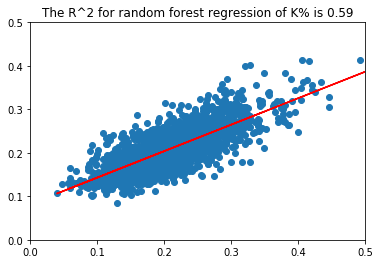

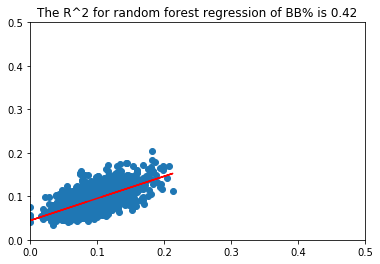

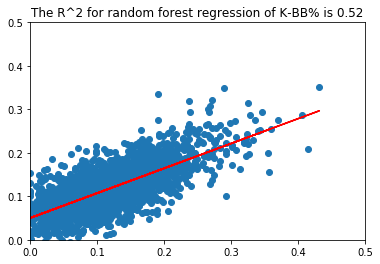

In [32]:
plt.figure(0)
plt.scatter(kk, k_hat)
plt.title(f'The R^2 for random forest regression of K% is {round(ksco,2)}')
b, m = poly(kk, k_hat, 1)
plt.plot(kk, b + m * kk, '-', c='r')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/mlk.png')

plt.figure(1)
plt.scatter(bb, b_hat)
plt.title(f'The R^2 for random forest regression of BB% is {round(bsco,2)}')
b, m = poly(bb, b_hat, 1)
plt.plot(bb, b + m * bb, '-', c='r')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/mlbb.png')

plt.figure(2)
plt.scatter(kb, kb_hat)
plt.title(f'The R^2 for random forest regression of K-BB% is {round(kbsco,2)}')
b, m = poly(kb, kb_hat, 1)
plt.plot(kb, b + m * kb, '-', c='r')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/mlkbb.png')

In [34]:
# kmdl.decision_path(xxx)

(<1225x15038 sparse matrix of type '<class 'numpy.int64'>'
 	with 160950 stored elements in Compressed Sparse Row format>,
 array([    0,  1481,  2994,  4533,  6046,  7519,  9040, 10501, 12034,
        13531, 15038], dtype=int32))

In [35]:
xxxx =tota[['ZLook', 'OLook', 'ZCon', 'ZWif', 'OCon', 'OWif', 'F-Strike%']] 
kkkk = tota['K%']
bbbb = tota['BB%']
kbkb = tota['K-BB%']

In [36]:
# lm = linear_model.LinearRegression()
# klmodel = lm.fit(xxx, kkk)
# blmodel = lm.fit(xxx, bbb)
# kblmodel = lm.fit(xxx, )

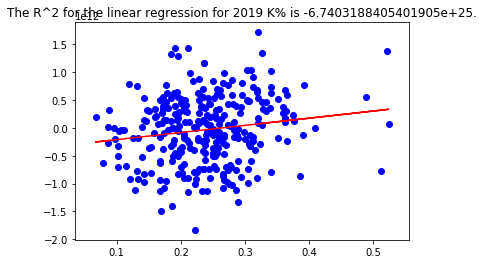

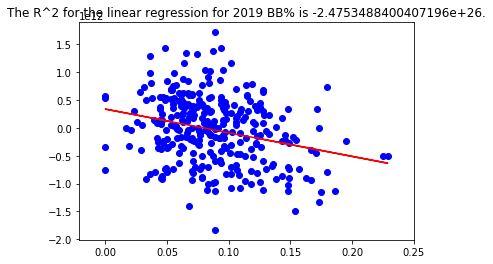

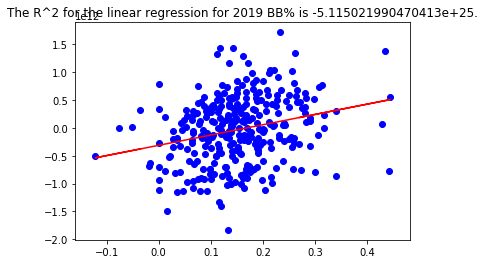

In [40]:
kpredicts = kmodel.predict(xxxx)
bpredicts = bmodel.predict(xxxx)
kbpredicts = kbmodel.predict(xxxx)
kscore = kmodel.score(xxxx, kkkk)
bscore = bmodel.score(xxxx, bbbb)
kbscore = kbmodel.score(xxxx, kbkb)

plt.figure(0)
plt.scatter(kkkk, kpredicts, c='b')
b, m = poly(kkkk, kpredicts, 1)
plt.plot(kkkk, b + m * kkkk, '-', c='r')
plt.title(f'The R^2 for the linear regression for 2019 K% is {round(kscore,2)}.')
plt.savefig('Outputs.19lk.png')

plt.figure(1)
plt.scatter(bbbb, bpredicts, c='b')
b, m = poly(bbbb, bpredicts, 1)
plt.plot(bbbb, b + m * bbbb, '-', c='r')
plt.title(f'The R^2 for the linear regression for 2019 BB% is {round(bscore,2)}.')
plt.savefig('Outputs.19lb.png')

plt.figure(2)
plt.scatter(kbkb, kbpredicts, c='b')
b, m = poly(kbkb, kbpredicts, 1)
plt.plot(kbkb, b + m * kbkb, '-', c='r')
plt.title(f'The R^2 for the linear regression for 2019 BB% is {round(kbscore,2)}.')
plt.savefig('Outputs.19lkb.png')

In [37]:
# print(kscore, bscore)

In [41]:
k_hat = kmdl.predict(xxxx)
b_hat = bmdl.predict(xxxx)
kb_hat = kbmdl.predict(xxxx)

In [42]:
[(x[0], x[1]) for x in zip(kmdl.feature_importances_, xxxx.columns)]

[(0.10749347022067282, 'ZLook'),
 (0.03825981966866506, 'OLook'),
 (0.06200283066649588, 'ZCon'),
 (0.27680801685542034, 'ZWif'),
 (0.05344372640578403, 'OCon'),
 (0.4199823826740875, 'OWif'),
 (0.04200975350887444, 'F-Strike%')]

In [43]:
[(x[0], x[1]) for x in zip(bmdl.feature_importances_, xxxx.columns)]

[(0.06244777974735949, 'ZLook'),
 (0.42293521406818774, 'OLook'),
 (0.09894558725415557, 'ZCon'),
 (0.10088498198454054, 'ZWif'),
 (0.10639080721664547, 'OCon'),
 (0.06199968793106875, 'OWif'),
 (0.1463959417980424, 'F-Strike%')]

In [44]:
[(x[0], x[1]) for x in zip(kbmdl.feature_importances_, xxxx.columns)]

[(0.07359722563522363, 'ZLook'),
 (0.18571402818293928, 'OLook'),
 (0.053504027950840125, 'ZCon'),
 (0.22521831534190526, 'ZWif'),
 (0.047417929377298405, 'OCon'),
 (0.3351076075719641, 'OWif'),
 (0.07944086593982921, 'F-Strike%')]

In [45]:
kscor = kmdl.score(xxxx, kkkk)
bscor = bmdl.score(xxxx, bbbb)
kbscor = kbmdl.score(xxxx, kbkb)

In [46]:
from sklearn.metrics import mean_absolute_error as mae

In [47]:
kscor2 = mae(kkkk, k_hat)
bscor2 = mae(bbbb, b_hat)
kbscor2 = mae(kbkb, kb_hat)

In [48]:
print(kscor2, bscor2, kbscor2)

0.041116447368421044 0.031171747076023392 0.056971381578947364


In [49]:
tota['xK'] = k_hat
tota['xBB'] = b_hat
tota['xK-BB'] = kb_hat
tota.to_csv("Resources/data2019.csv")

(0, 0.5)

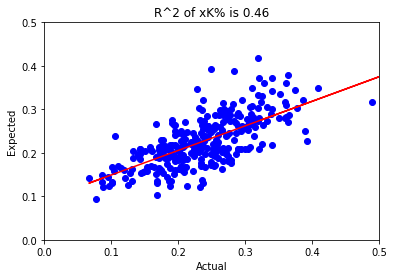

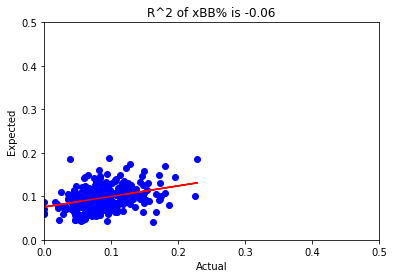

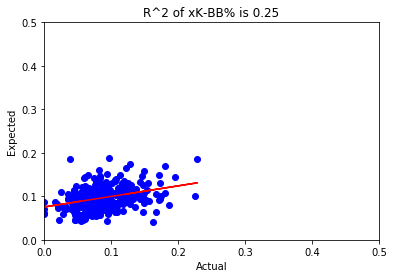

In [51]:
plt.figure(0)
plt.title(f'R^2 of xK% is {round(kscor,2)}')
plt.scatter(kkkk, k_hat, c='b')
b, m = poly(kkkk, k_hat, 1)
plt.plot(kkkk, b + m * kkkk, '-', c='r')
plt.xlabel('Actual')
plt.ylabel('Expected')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/xK2019.png')

plt.figure(1)
plt.scatter(bbbb, b_hat, c='b')
plt.title(f'R^2 of xBB% is {round(bscor,2)}')
b, m = poly(bbbb, b_hat, 1)
plt.plot(bbbb, b + m * bbbb, '-', c='r')
plt.xlabel('Actual')
plt.ylabel('Expected')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)
plt.savefig('Outputs/xK2019.png')
          
plt.figure(2)
plt.scatter(bbbb, b_hat, c='b')
plt.title(f'R^2 of xK-BB% is {round(kbscor,2)}')
b, m = poly(bbbb, b_hat, 1)
plt.plot(bbbb, b + m * bbbb, '-', c='r')
plt.xlabel('Actual')
plt.ylabel('Expected')
plt.xlim(0,0.5)
plt.ylim(0, 0.5)